In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
dataset=pd.read_csv("crimes.csv",sep=";")

In [13]:
dataset.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [14]:
dataset.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


In [15]:
dataset.shape

(50, 8)

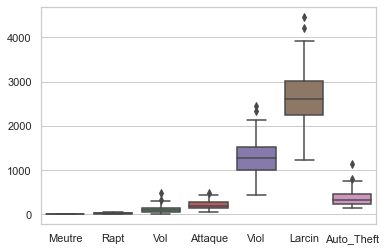

In [23]:
sns.set(style="whitegrid")
sns.boxplot(data=dataset)
plt.show()

In [22]:
dataset[dataset['Viol']>2300]

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
27,Nevada,15.8,49.1,323.1,355.0,2453.1,4212.6,559.2


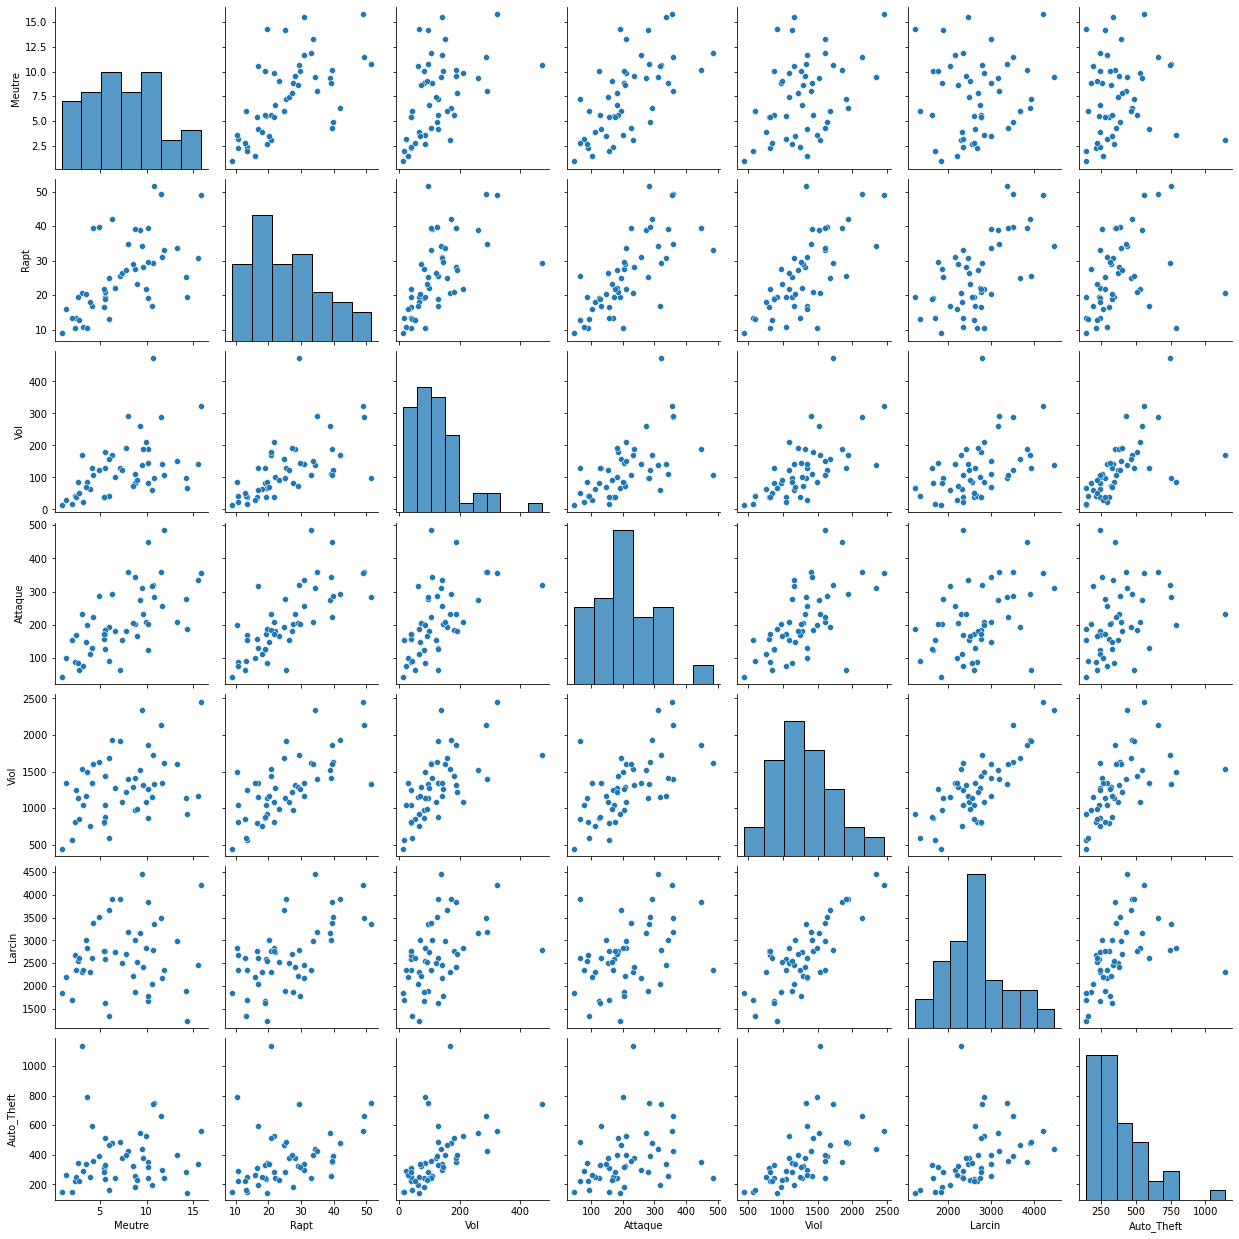

In [18]:
sns.pairplot(dataset)
plt.show()

# Correlations

In [19]:
correlations=dataset.corr(method='pearson')
correlations

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


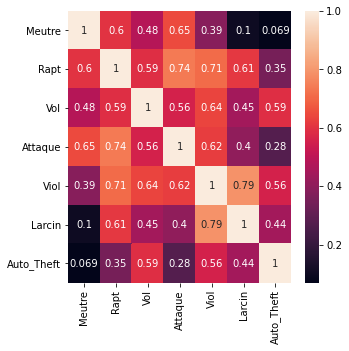

In [21]:
f , ax=plt.subplots(figsize=(5,5))
sns.heatmap(correlations, annot=True)
plt.show()

# Independent variables and labels

In [25]:
X = dataset.iloc[:,1:8].values
labels=dataset.iloc[:,0].values
print(labels)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New-Hampshire' 'New-Jersey' 'New-Mexico' 'New-York'
 'North-Carolina ' 'North-Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode-Island' 'South-Carolina ' 'South-Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West-Virginia' 'Wisconsin' 'Wyoming']


# Principal Component Analysis (PCA) and standardisation

In [36]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
pca=PCA(n_components=None)
X_pca= pca.fit_transform(X_scaler)

In [38]:
print(pca.explained_variance_ratio_)

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


In [41]:
sum(pca.explained_variance_ratio_ [:2])

0.7648116201908643

In [44]:
X_pca.shape

(50, 7)

In [43]:
X_pca[0,:]

array([-0.05038664, -2.11738312,  0.50673755,  0.25353338,  0.50354699,
       -0.43802073, -0.11927372])

# Visualization

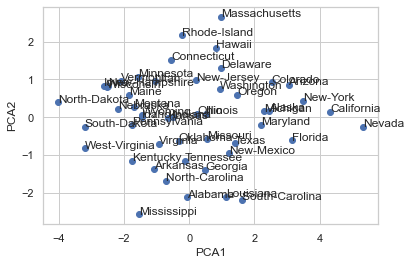

In [46]:
plt.scatter(X_pca[:,0],X_pca[:,1])
for label, x, y in zip(labels , X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# KMeans Clustering

KMeans intuition

In [82]:
from sklearn.cluster import KMeans 

In [83]:
wcss=[]
for k in range(1,11):
    Kmeans = KMeans(n_clusters = k , init= 'k-means++', random_state=0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
    

In [84]:
wcss

[37698133.220400006,
 16497439.003786767,
 9975258.82333333,
 7196005.88323985,
 5908454.66496825,
 4944577.506666667,
 4193150.4670317457,
 3656213.387420635,
 3180597.555269841,
 2916679.8897619043]

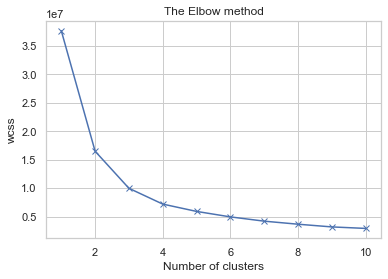

In [85]:
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [98]:
Kmeans = KMeans(n_clusters = 4 , init= 'k-means++', random_state=0)
Kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [99]:
y_Kmeans = Kmeans.labels_
y_Kmeans

array([2, 3, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3,
       0, 2, 0, 0, 0, 1, 0, 3, 3, 3, 0, 2, 0, 0, 3, 2, 3, 0, 2, 2, 3, 3,
       0, 0, 3, 2, 0, 0])

In [100]:
dataset.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [108]:
dataset.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


# Clustering visualization

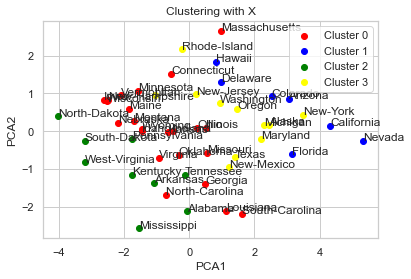

In [101]:
plt.scatter(X_pca[y_Kmeans==0,0],X_pca[y_Kmeans==0,1], c='red', label='Cluster 0')
plt.scatter(X_pca[y_Kmeans==1,0],X_pca[y_Kmeans==1,1], c='blue', label='Cluster 1')
plt.scatter(X_pca[y_Kmeans==2,0],X_pca[y_Kmeans==2,1], c='green', label='Cluster 2')
plt.scatter(X_pca[y_Kmeans==3,0],X_pca[y_Kmeans==3,1], c='yellow', label='Cluster 3')
for label, x, y in zip(labels , X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y)) 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering with X')
plt.legend()
plt.show()

In [102]:
Kmeans2 = KMeans(n_clusters = 4 , init= 'k-means++', random_state=0)
Kmeans2.fit(X_scaler)

KMeans(n_clusters=4, random_state=0)

In [103]:
y_Kmeans_sc = Kmeans2.labels_
y_Kmeans_sc

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 3, 2, 3,
       0, 1, 1, 0, 0, 3, 0, 2, 1, 3, 1, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0])

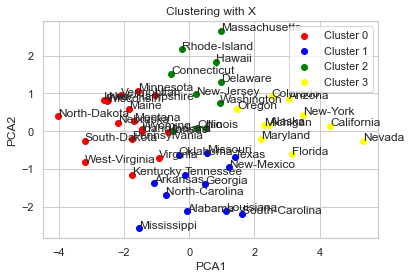

In [92]:
plt.scatter(X_pca[y_Kmeans_sc==0,0],X_pca[y_Kmeans_sc==0,1], c='red', label='Cluster 0')
plt.scatter(X_pca[y_Kmeans_sc==1,0],X_pca[y_Kmeans_sc==1,1], c='blue', label='Cluster 1')
plt.scatter(X_pca[y_Kmeans_sc==2,0],X_pca[y_Kmeans_sc==2,1], c='green', label='Cluster 2')
plt.scatter(X_pca[y_Kmeans_sc==3,0],X_pca[y_Kmeans_sc==3,1], c='yellow', label='Cluster 3')
for label, x, y in zip(labels , X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y)) 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering with X')
plt.legend()
plt.show()

In [96]:
Kmeans3 = KMeans(n_clusters = 4 , init= 'k-means++', random_state=0)
Kmeans3.fit(X_pca)

KMeans(n_clusters=4, random_state=0)

In [97]:
y_Kmeans_pca = Kmeans3.labels_
y_Kmeans_pca

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 3, 2, 3,
       0, 1, 1, 0, 0, 3, 0, 2, 1, 3, 1, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0])

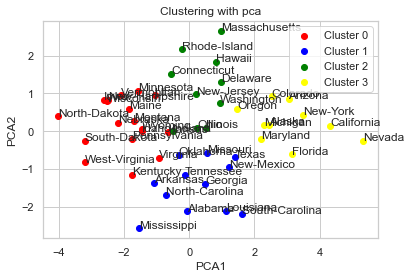

In [104]:
plt.scatter(X_pca[y_Kmeans_pca==0,0],X_pca[y_Kmeans_pca==0,1], c='red', label='Cluster 0')
plt.scatter(X_pca[y_Kmeans_pca==1,0],X_pca[y_Kmeans_pca==1,1], c='blue', label='Cluster 1')
plt.scatter(X_pca[y_Kmeans_pca==2,0],X_pca[y_Kmeans_pca==2,1], c='green', label='Cluster 2')
plt.scatter(X_pca[y_Kmeans_pca==3,0],X_pca[y_Kmeans_pca==3,1], c='yellow', label='Cluster 3')
for label, x, y in zip(labels , X_pca[:,0], X_pca[:,1]):
    plt.annotate(label, xy=(x,y)) 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering with pca')
plt.legend()
plt.show()

In [107]:
sum(y_Kmeans_sc - y_Kmeans_pca)

0

In [115]:
dataset.iloc[7,:]

Etat          Delaware
Meutre             6.0
Rapt              24.9
Vol              157.0
Attaque          194.2
Viol            1682.6
Larcin          3678.4
Auto_Theft       467.0
Name: 7, dtype: object

# Profiling

In [116]:
Kmeans2.cluster_centers_.shape

(4, 7)

In [117]:
dataset_cluster = pd.concat([dataset, pd.DataFrame({'Cluster' : y_Kmeans_sc})] , axis=1)


In [118]:
dataset_cluster.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft,Cluster
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7,1
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3,3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5,3
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4,1
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5,3


In [119]:
Xc = dataset_cluster.iloc[:,1:8].values
yc = dataset_cluster.iloc[:,8].values

In [124]:
! pip install graphviz 
import graphviz
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier , export_graphviz


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
x_train,x_test,y_train,y_test=train_test_split(Xc,yc,test_size=0.2,random_state=0)
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [132]:
y_predictDT=DT.predict(x_test)
print(confusion_matrix(y_test,y_predictDT))

[[3 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 4]]
